In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from torch.optim import SGD
from torch.nn import CrossEntropyLoss

In [ ]:


def generate_training_instances(sentence, window_size):
    instances = []
    words = sentence.split()
    for i in range(window_size, len(words) - window_size):
        target_word = words[i]
        context = words[i - window_size:i] + words[i + 1:i + window_size + 1]
        instances.append((context, target_word))
    return instances

# Define the new training sentence
new_training_sentence = "Artificial Intelligence can replace humans in several jobs and applications"

# Compute the vocabulary
vocabulary = list(set(new_training_sentence.split()))

# Generate training instances with a context window of size 4
training_instances = generate_training_instances(new_training_sentence, 2)

# Print vocabulary
print("Vocabulary:", vocabulary)

# Print training instances
print("\nTraining Instances:")
for i, instance in enumerate(training_instances):
    context, target_word = instance
    target_vector = np.zeros(len(vocabulary))
    target_vector[vocabulary.index(target_word)] = 1
    print(f"{i+1}- {' '.join(context)}. Target: {target_word}.")
    print(f"   Target: {target_word}: {target_vector};")
    print(f"   Training instance: {context}.")


Vocabulary: ['several', 'jobs', 'humans', 'in', 'applications', 'Intelligence', 'replace', 'Artificial', 'can', 'and']

Training Instances:
1- Artificial Intelligence replace humans. Target: can.
   Target: can: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.];
   Training instance: ['Artificial', 'Intelligence', 'replace', 'humans'].
2- Intelligence can humans in. Target: replace.
   Target: replace: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.];
   Training instance: ['Intelligence', 'can', 'humans', 'in'].
3- can replace in several. Target: humans.
   Target: humans: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.];
   Training instance: ['can', 'replace', 'in', 'several'].
4- replace humans several jobs. Target: in.
   Target: in: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.];
   Training instance: ['replace', 'humans', 'several', 'jobs'].
5- humans in jobs and. Target: several.
   Target: several: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.];
   Training instance: ['humans', 'in', 'jobs', 'and'].
6- in several and applications. Target: jobs.
   Target: j

In [ ]:


class LanguageModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim):
        super(LanguageModel, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.hidden_layer = nn.Linear(embedding_dim * 4, hidden_dim)
        self.output_layer = nn.Linear(hidden_dim, vocab_size)

    def forward(self, inputs):
        embedded = self.embeddings(inputs).view(1, -1)
        hidden_output = F.relu(self.hidden_layer(embedded))
        output = self.output_layer(hidden_output)
        return F.log_softmax(output, dim=1)

# Define parameters
vocab_size = len(vocabulary)
embedding_dim = 3
hidden_dim = 10

# Initialize the model
model = LanguageModel(vocab_size, embedding_dim, hidden_dim)
print(model)


LanguageModel(
  (embeddings): Embedding(10, 3)
  (hidden_layer): Linear(in_features=12, out_features=10, bias=True)
  (output_layer): Linear(in_features=10, out_features=10, bias=True)
)


In [ ]:

# Define loss function and optimizer
criterion = CrossEntropyLoss()
optimizer = SGD(model.parameters(), lr=0.01)

# Function to train the model
def train_model(model, training_instances, num_epochs):
    losses = []
    for epoch in range(num_epochs):
        total_loss = 0
        for context, target_word in training_instances:
            # Convert context and target word to tensors
            context_indices = torch.tensor([vocabulary.index(word) for word in context], dtype=torch.long)
            target_index = torch.tensor([vocabulary.index(target_word)], dtype=torch.long)

            optimizer.zero_grad()

            # Forward pass
            output = model(context_indices)

            loss = criterion(output, target_index)
            total_loss += loss.item()

            # Backward pass and optimization
            loss.backward()
            optimizer.step()

        # Calculate average loss for the epoch
        avg_loss = total_loss / len(training_instances)
        losses.append(avg_loss)
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss}")

    return losses

Epoch [1/1000], Loss: 2.3451555967330933
Epoch [2/1000], Loss: 2.3171934882799783
Epoch [3/1000], Loss: 2.2898832162221274
Epoch [4/1000], Loss: 2.263096113999685
Epoch [5/1000], Loss: 2.236714462439219
Epoch [6/1000], Loss: 2.2106314500172934
Epoch [7/1000], Loss: 2.1851032376289368
Epoch [8/1000], Loss: 2.1603437860806785
Epoch [9/1000], Loss: 2.1357637445131936
Epoch [10/1000], Loss: 2.111321965853373
Epoch [11/1000], Loss: 2.0869353214899697
Epoch [12/1000], Loss: 2.062751134236654
Epoch [13/1000], Loss: 2.0383063356081643
Epoch [14/1000], Loss: 2.0135464469591775
Epoch [15/1000], Loss: 1.9889650543530781
Epoch [16/1000], Loss: 1.9644354581832886
Epoch [17/1000], Loss: 1.9395561218261719
Epoch [18/1000], Loss: 1.9143811861673992
Epoch [19/1000], Loss: 1.8890110850334167
Epoch [20/1000], Loss: 1.8629708290100098
Epoch [21/1000], Loss: 1.836970825990041
Epoch [22/1000], Loss: 1.8100199500719707
Epoch [23/1000], Loss: 1.782781849304835
Epoch [24/1000], Loss: 1.7550122638543446
Epoch [

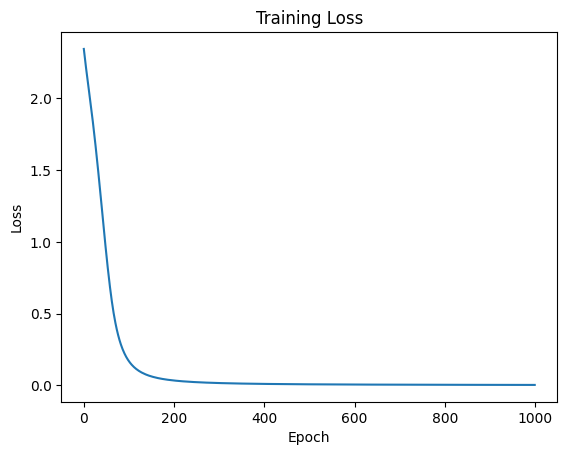

In [ ]:


# Train the model
num_epochs = 1000
losses = train_model(model, training_instances, num_epochs)

# Plot the training loss
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()